In [2]:
import os
import json
import argparse
import pandas as pd
from rdkit import Chem
from transformers import AutoTokenizer
from verl.utils.hdfs_io import copy, makedirs  
import os
import json
import pandas as pd
from rdkit import Chem
from transformers import AutoTokenizer
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import rdBase
from rdkit import RDLogger
from typing import List, Tuple, Dict
from rdkit import Chem
from rdkit.Chem import rdmolops, AllChem
from rdkit.Chem import Draw
rdBase.DisableLog('rdApp.error')
RDLogger.DisableLog('rdApp.warning')
RDLogger.DisableLog('rdApp.*')
from datasets import load_dataset


In [3]:
train_data = "/vepfs/fs_projects/FunMG/LLM/dataset/datasets--GreatCaptainNemo--HME_dataset/snapshots/934c6a76f50e1f90eb83abdbc8b5366dde00639e/desc2mol_train.json"
with open(train_data, 'r') as all_f:
    data = json.load(all_f)


In [8]:
data

[{'smiles': 'CCCCC[C@@H]1O[C@@H]1/C=C/C(O)C/C=C\\C/C=C\\CCCC(=O)[O-]',
  'selfies': '',
  'description': 'The molecule is an epoxy(hydroxy)icosatrienoate that is the conjugate base of 11 hydroxy-(14R,15S)-epoxy-(5Z,8Z,12E)-icosatrienoic acid, obtained by deprotonation of the carboxy group; major species at pH 7.3. It is a conjugate base of an 11 hydroxy-(14R,15S)-epoxy-(5Z,8Z,12E)-icosatrienoic acid.',
  'fragments': '<|O|><|CC|><|CC|><|CC|><|CCC|><|CCO|><|CCC=O|><|CCCCCCO|>',
  'metadata': {}},
 {'smiles': '[125Te]',
  'selfies': '',
  'description': 'The molecule is the stable isotope of tellurium with relative atomic mass 124.904425, 71.4 atom percent natural abundance and nuclear spin 1/2.',
  'fragments': '',
  'metadata': {}},
 {'smiles': 'CC(=O)O[C@@H]1C[C@H]2C(C)(C)C(=O)C=C[C@]2(C)[C@H]2CC[C@]3(C)C(=CC[C@H]3c3ccoc3)[C@@]21C',
  'selfies': '',
  'description': 'The molecule is a tetracyclic triterpenoid that is 4,4,8-trimethylandrosta-1,14-diene substituted by an oxo group at po

In [6]:
data[0]['smiles']

'CCCCC[C@@H]1O[C@@H]1/C=C/C(O)C/C=C\\C/C=C\\CCCC(=O)[O-]'

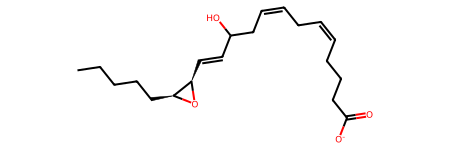

In [25]:
Chem.MolFromSmiles('CCCCC[C@@H]1O[C@@H]1/C=C/C(O)C/C=C\\C/C=C\\CCCC(=O)[O-]')

In [23]:
from rdkit import Chem
from rdkit.Chem.BRICS import BRICSDecompose
from rdkit.Chem import Draw

smiles = "CCCCC[C@@H]1O[C@@H]1/C=C/C(O)C/C=C\\C/C=C\\CCCC(=O)[O-]"
mol = Chem.MolFromSmiles(smiles)



In [ ]:
#! pip install EFGs

In [24]:
from EFGs import mol2frag
from rdkit.Chem.Draw import IPythonConsole
from rdkit import Chem
from EFGs import mol2frag
mol2frag(mol)

(['C=C/[C@@H]1CO1', 'O', 'C=C', 'C=C', 'O=C[O-]'],
 ['CCCCC', 'C030', 'C020', 'C020', 'CCC'])

In [22]:
len(mol2frag(mol))

2

['C=C/[C@@H]1CO1', 'O', 'C=C', 'C=C', 'O=C[O-]'] ['CCCCC', 'C030', 'C020', 'C020', 'CCC'] [(9, 8, 7, 5, 6), (11,), (13, 14), (16, 17), (22, 21, 23)] [(0, 1, 2, 3, 4), (10,), (12,), (15,), (18, 19, 20)]


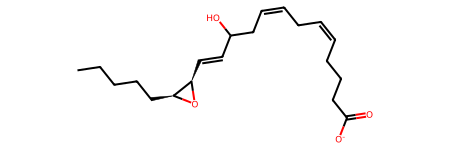

In [16]:
print(*mol2frag(mol, returnidx=True))
display(mol)

In [18]:
from IPython.display import SVG, Image
from rdkit import Chem
from rdkit.Chem import rdDepictor,Descriptors
from rdkit.Chem.Draw import rdMolDraw2D
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import re
from EFGs import mol2frag
def prettymol(smiles, asMol=False, label=None, path='', imgsize=(300, 200), highlights=None):
    '''
    highlights is a dictionary, which may contains:
    highlightAtoms: list
    highlightBonds: list
    highlightAtomRadii: dict[int]=float, atom index (int), radius (float)
    highlightAtomColors: dict[int]=tuple, index (int), color (tuple, length=3)
    highlightBondColors: dict[int]=tuple,index (int), color (tuple, length=3)
    '''
    if asMol:
        mol = smiles.__copy__()
    else:
        mol = Chem.MolFromSmiles(smiles)
    try:
        mol = rdMolDraw2D.PrepareMolForDrawing(mol)
        if '.png' in path:
            drawer = rdMolDraw2D.MolDraw2DCairo(*imgsize)
        else:
            drawer = rdMolDraw2D.MolDraw2DSVG(*imgsize)
        opts = drawer.drawOptions()
        if label == 'map':
            for i in range(mol.GetNumAtoms()):
                opts.atomLabels[i] = mol.GetAtomWithIdx(
                    i).GetSymbol()+str(mol.GetAtomWithIdx(i).GetAtomMapNum())
        if label == 'idx':
            for i in range(mol.GetNumAtoms()):
                opts.atomLabels[i] = mol.GetAtomWithIdx(i).GetSymbol()+str(i)
        if not highlights:
            drawer.DrawMolecule(mol)
        else:
            drawer.DrawMolecule(mol, **highlights)
        drawer.FinishDrawing()
        if '.png' in path:
            drawer.WriteDrawingText(path)
            display(Image(path))
        else:
            svg = drawer.GetDrawingText()
            display(SVG(svg.replace('svg:','')))
            if '.svg' in path:
                with open(path, 'w') as wf:
                    print(svg, file=wf)
        return drawer
    except Exception as e:
        print("Check your molecule!!!",e)
        return

/tmp/ipykernel_497156/1089936129.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  my_cmap = cm.get_cmap('cool')


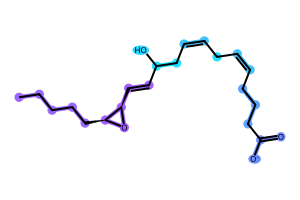

In [20]:
my_cmap = cm.get_cmap('cool')
patt = r'[C,H][0-9]{2}[0,-1,1]'
# Get normalize function (takes data in range [vmin, vmax] -> [0, 1])
my_norm = Normalize(vmin=0, vmax=100)

smiles = "CCCCC[C@@H]1O[C@@H]1/C=C/C(O)C/C=C\\C/C=C\\CCCC(=O)[O-]"
mol = Chem.MolFromSmiles(smiles)

a,b,c,d = mol2frag(mol, returnidx=True)
atommap,bondmap = {}, {}
for s,i in zip(a+b, c+d):
    if re.match(patt, s):
        m = Chem.MolFromSmiles(s[0])
    else:
        m = Chem.MolFromSmiles(s)
    mw = Descriptors.HeavyAtomMolWt(m)
    atommap.update({x:my_cmap(my_norm(mw))[:3] for x in i})

for b in mol.GetBonds():
    if atommap[b.GetBeginAtomIdx()] == atommap[b.GetEndAtomIdx()]:
        bondmap[b.GetIdx()]=atommap[b.GetBeginAtomIdx()]

highlights = {
    "highlightAtoms": list(atommap.keys()),
    "highlightAtomColors": atommap,
    "highlightBonds": list(bondmap.keys()),
    "highlightBondColors": bondmap,
}

prettymol(smiles, highlights=highlights,path='sample_mol.png')

In [21]:
from EFGs import mol2frag
from rdkit.Chem.Draw import IPythonConsole
from rdkit import Chem
from EFGs import mol2frag
mol2frag(mol)

(['C=C/[C@@H]1CO1', 'O', 'C=C', 'C=C', 'O=C[O-]'],
 ['CCCCC', 'C030', 'C020', 'C020', 'CCC'])